Jolene Branch DSC530 Data Exploration and Analysis Bellevue University Term Project: Do facilities (with ERs) with larger volume of patients tend to get fibrinolynic (clot busting) therapy administered within 30 minutes of ER/ED arrival better than smaller facilities? Date: February 29, 2020. I used data.medicare.gov - Hospital Compare Datasets > Downloaded CSV Flatfiles > saved as compressed (zip) folder in C\Users|Branch\DSC530 EDA\Hospital_Revised_Flatfiles. I'm using "Timely and Effective Care - Hospital." The data was last updated October 30, 2019. Jupyter folder: DSC530EDA >DSC 530 term project Had to move the Excel workbook I chose into the exact same Directory as the working directory in Jupyter.

Milestone 1 – Evaluate datasets, start thinking of statistical questions: I initially planned to use the data.medicare.gov dataset called "Payment and Value of Care - Hospital," as I was interested in variables influencing the overall quality ratings of hospitals, but the dataset did not have the required number of variables for this term project. I switched to "Timely and Effective Care - Hospital," which contains more detailed quality metrics. The question I am looking into is "Do facilities (with ERs) with larger volume of patients tend to get fibrinolynic (clot busting) therapy administered within 30 minutes of ER/ED arrival better than smaller facilities?"  There are 4586 unique facilities in this dataset.  Each facility has up to 19 measures reported.  Since not all facilities offer all services, there are many 'N/A's in the dataset.

Import numpy and pandas (so I can make the dataframe in pandas)

In [ ]:
pwd

In [570]:
from __future__ import print_function, division           # for future programs!
import matplotlib

# Needed to show charts in Jupyter:
%matplotlib inline                            

import thinkstats2
import thinkplot
import first
import nsfg
#import matplotlib
import matplotlib.pyplot as plt               # so I can add a titles to plots

In [571]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import Series, DataFrame     # p 125 of Python for Data Analysis says "You may also find it easier to import Series and DataFrame into the local namespace since they are so frequently used."
import csv
data = pd.read_csv("Timely and Effective Care - Hospital.csv")       # put in same Directory (C/Users/Branch/Documents/GitHub/ThinkStats2/code) to avoid errors on import
data.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Start Date,End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,EDV,Emergency department volume,high,NaN,NaN,01/01/2017,12/31/2017
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,ED_1b,Average (median) time patients spent in the em...,242,615,2,01/01/2018,12/31/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Emergency Department,ED_2b,Average (median) time patients spent in the em...,73,615,2,01/01/2018,12/31/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Preventive Care,IMM_2,Immunization for influenza,92,538,2,10/01/2017,03/31/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Preventive Care,IMM_3,Healthcare workers given influenza vaccination,98,4232,NaN,10/01/2018,03/31/2019


In [572]:
data.index             # Don't know that this provided anything useful
# Oh, it did.  There are 4587 facilities in this dataframe.  Each has 19 rows for total of 90383 entries.

RangeIndex(start=0, stop=90383, step=1)

In [ ]:
data.info()            # to see if I am really dealing with a dataframe

In [ ]:
data.describe()                # This gave me no new useful information.

I need to reshape the data. This dataframe is not 'tidy!'  I need to take the column with the measure mnemonics ('Measure ID') and split it so each possible response/measure gets its own column. I also need to make sure the NA cells don't result in dropped rows or columns. I should still have 90,383 entries. No wait! This method took each facility and put all its measures on ONE row, and from the head() results I can see that rows and columns with NAs in them were not dropped. https://www.datacamp.com/community/blog/pandas-cheat-sheet-python
While this worked out pretty slick for me, I think the only reason it did was that the EDV (emergency department volume) variable was put in the same 'Measure Name'/'Score' columns as all the actual process measures to begin with.  Otherwise by using this pivot() method, I would have lost that data, as I did with the footnotes, facility name/address, start/end dates...

In [574]:
reshaped_df = data.pivot(index ='Facility ID', columns='Measure ID', values = 'Score')
reshaped_df.head()
# Woo hoo!  Now I am down to one entry per facility!

Measure ID,EDV,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_18c,OP_2,OP_22,OP_23,OP_29,OP_30,OP_31,OP_33,OP_3b,OP_5,PC_01,SEP_1,VTE_6
Facility ID,,,,,,,,,,,,,,,,,,,
10001,high,242,73,92,98,170,195,Not Available,3,Not Available,74,97,Not Available,Not Available,Not Available,Not Available,3,60,0
10005,very high,248,75,99,91,113,215,Not Available,2,95,78,96,Not Available,90,53,14,1,68,Not Available
10006,high,230,70,99,93,146,Not Available,Not Available,1,Not Available,74,85,Not Available,Not Available,Not Available,Not Available,0,30,14
10007,low,100,65,99,85,108,141,Not Available,3,Not Available,58,0,100,Not Available,Not Available,6,Not Available,89,Not Available
10008,low,193,78,89,14,87,Not Available,Not Available,0,Not Available,58,50,Not Available,Not Available,Not Available,9,Not Available,29,Not Available


Delete columns I am not interested in. These are preventative health measures that have nothing to do with ER/ED timeliness. Use drop()

In [575]:
lean_df = reshaped_df.drop(['IMM_2', 'IMM_3', 'OP_18c', 'OP_29', 'OP_30', 'OP_31', 'OP_33', 'PC_01', 'SEP_1', 'VTE_6'], axis=1)
lean_df.head()

Measure ID,EDV,ED_1b,ED_2b,OP_18b,OP_2,OP_22,OP_23,OP_3b,OP_5
Facility ID,,,,,,,,,
10001,high,242,73,170,Not Available,3,Not Available,Not Available,Not Available
10005,very high,248,75,113,Not Available,2,95,53,14
10006,high,230,70,146,Not Available,1,Not Available,Not Available,Not Available
10007,low,100,65,108,Not Available,3,Not Available,Not Available,6
10008,low,193,78,87,Not Available,0,Not Available,Not Available,9


I want to delete all the facilities with 'Not Available' for OP_2 (Outpatients with chest pain or possible heart attack who needed specialized care within 30 minutes of arrival), since that is what I am asking the question about.  This leaves me with a dataset of 83 rows and 9 columns.

In [ ]:
# Found this in stackoverflow by asking how to delete all rows based on the value of one column: 
lean_df[lean_df["OP_2"] != 'Not Available']
'''Got this warning and have no idea what it means:  

C:\Users\Branch\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)'''
# But I still have 4757 rows, so I think I'm OK.

# Milestone 2
Select a dataset, solidify your statistical question, begin describing the single variables in your dataset to determine which variables are relevant to your question (Distributions, PMFs, CDFs). You should know your statistical question you are trying to answer by no later than Week 3. 

My question is "Do facilities (with ERs) with larger volume of patients tend to get fibrinolynic (clot busting) therapy administered within 30 minutes of ER/ED arrival better than smaller facilities?"

The question as non-medical people might understand it better:  "If you are having chest pain, are you going to receive treatment quicker if you go to an ER with a high volume of patients or one with a low volume of patients?"

Variables to be used:

OP-2 Outpatients with chest pain or possible heart attack who got drugs to break up blood clots within 30 minutes of arrival 

OP-18b Average (median) time patients spent in the emergency department before leaving from the visit

OP-23 Percentage of patients who came to emergency department with stroke symptoms who received brain scan results within 45 minutes of arrival 

OP-3b Average (median) number of minutes before outpatients with chest pain or possible heart attack who needed specialized care were transferred to another hospital

OP-5 Average (median) number of minutes before outpatients with chest pain or possible heart attack got an ECG  

Need to change all columns containing the quality metrics (except EDV - ED Volume) to numeric in order to put them into histograms and do other calculations with them.

In [577]:
lean_df['OP_2'] = pd.to_numeric(lean_df['OP_2'], errors='coerce')
lean_df['ED_1b'] = pd.to_numeric(lean_df['ED_1b'], errors='coerce')
lean_df['ED_2b'] = pd.to_numeric(lean_df['ED_2b'], errors='coerce')
lean_df['OP_18b'] = pd.to_numeric(lean_df['OP_18b'], errors='coerce')
lean_df['OP_22'] = pd.to_numeric(lean_df['OP_22'], errors='coerce')
lean_df['OP_23'] = pd.to_numeric(lean_df['OP_23'], errors='coerce')
lean_df['OP_3b'] = pd.to_numeric(lean_df['OP_3b'], errors='coerce')
lean_df['OP_5'] = pd.to_numeric(lean_df['OP_5'], errors='coerce')
# I probably should have created a function here.  This is not very 'pythonic or 'DRY.'

In [578]:
lean_df.head()

Measure ID,EDV,ED_1b,ED_2b,OP_18b,OP_2,OP_22,OP_23,OP_3b,OP_5
Facility ID,,,,,,,,,
10001,high,242.0,73.0,170.0,NaN,3.0,NaN,NaN,NaN
10005,very high,248.0,75.0,113.0,NaN,2.0,95.0,53.0,14.0
10006,high,230.0,70.0,146.0,NaN,1.0,NaN,NaN,NaN
10007,low,100.0,65.0,108.0,NaN,3.0,NaN,NaN,6.0
10008,low,193.0,78.0,87.0,NaN,0.0,NaN,NaN,9.0


In [ ]:
lean_df.info()

Grouped means (p. 19 in Pandas book)
Grouping for each ER volumn category (low, med, high, very high), what was the average ________?

In [581]:
# need to split the data into parts by ER volume (EDV)
# then get whatever measure column I want and calculate the mean (OP_2, OP_18b, ...)
print(lean_df.groupby('EDV')['OP_2'].mean())

# The mean in this case is the mean of the percent of cases in each level of volume of ER that got the patient 'clotbusters' within 30 miutes.
# This is also referred to as "door to needle time."

EDV
Not Available    46.500000
high             77.166667
low              66.851852
medium           69.000000
very high        54.666667
Name: OP_2, dtype: float64


In [ ]:
lean_df.EDV.value_counts()
# I need to figure out how to get rid of the facilities for which EDV is not available!

# Moment of clarity!  Removing all rows that have EDV 'Not Available' 

In [ ]:
# Delete all rows based on the the value in a column (from StackOverflow) : df[df["columnname"] != 'valueIdonotwant']
EDV_df = lean_df[lean_df["EDV"] != 'Not Available']
EDV_df.head()

In [ ]:
EDV_df.info()
# This shows that the 981 facilities that did not have ER volume (EDV) recorded have been removed from the dataset.  
#  Ugh.  That means I need to redo ALL of the histograms AGAIN!

Text(0.5, 1.0, 'Clotbusters Within 30 Minutes')

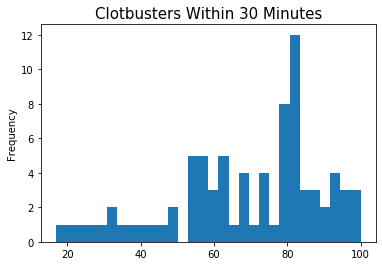

In [585]:
# get a true frequency histogram like OP_23 has:
OP_2_newhist = EDV_df['OP_2'].plot.hist(bins=30)
plt.title("Clotbusters Within 30 Minutes", fontsize=15)

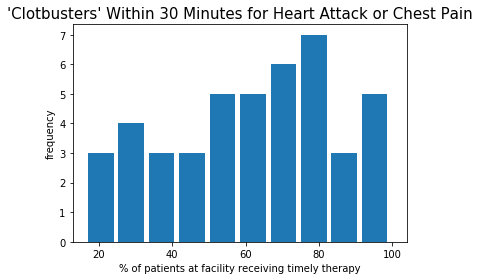

<Figure size 576x432 with 0 Axes>

In [586]:
hist_OP_2 = thinkstats2.Hist(EDV_df.OP_2)             

plt.title("'Clotbusters' Within 30 Minutes for Heart Attack or Chest Pain", fontsize=15)
plt.hist(x=hist_OP_2, width=7, bins=10)       # used instead of thinkplot.Hist(...) so I could adjust the bin size
thinkplot.Show(xlabel='% of patients at facility receiving timely therapy', ylabel='frequency')
# This might be confusing.  I think it is the frequency of number of hospitals with that average % of patients receving the therapy on time.

In [587]:
mean_OP_2 = EDV_df.OP_2.mean()
print('Mean is', mean_OP_2)

mode_OP_2 = EDV_df.OP_2.mode()
print('Mode is', mode_OP_2)

std_OP_2 = EDV_df.OP_2.std()
print('Standard deviation is', std_OP_2)

print('The tail extends farther to the left than right.  Results are not normally distributed.  There appears to be a cluster of facilities that get the clotbusting medication administered on time around 55% of the time, and another cluster of facilities that get the medication administered on time around 80% of the time.  I do not know if the cluster around 55% is enough to call this a bimodal distribution.')

Mean is 68.96296296296296
Mode is 0    82.0
dtype: float64
Standard deviation is 20.351562866549372
The tail extends farther to the left than right.  Results are not normally distributed.  There appears to be a cluster of facilities that get the clotbusting medication administered on time around 55% of the time, and another cluster of facilities that get the medication administered on time around 80% of the time.  I do not know if the cluster around 55% is enough to call this a bimodal distribution.


Interesting: p. 17 in text says "When the argument passed to Hist is a pandas Series, any nan values are dropped." I wonder if that means I didn't need to figure out how to delete all the rows in which the OP_2 column was blank?! Interesting that this histogram has the tail to the left and most of the others are to the right. What I've lost on here is the volume of the facilities. A color-coded scatter plot in R would be much better. I think this is accurate, though. 1/18 20:07.

In [588]:
# Grouping for each ER volumn category (low, med, high, very high), what was the average ________?
# need to split the data into parts by ER volume (EDV)
# then get whatever measure column I want and calculate the mean (OP_2, OP_18b, ...)
print(EDV_df.groupby('EDV')['OP_2'].mean())

EDV
high         77.166667
low          66.851852
medium       69.000000
very high    54.666667
Name: OP_2, dtype: float64


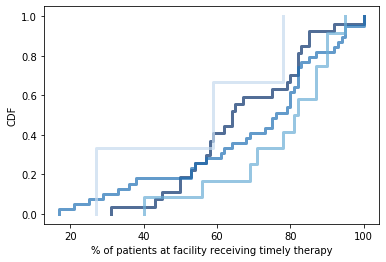

<Figure size 576x432 with 0 Axes>

In [589]:
#using same CDFs code as worked for 18b:
low_cdf_OP_2 = thinkstats2.Cdf(low.EDV, label='low')
medium_cdf_OP_2 = thinkstats2.Cdf(medium.EDV, label='medium')
high_cdf_OP_2 = thinkstats2.Cdf(high.EDV, label='high')
very_high_cdf_OP_2 = thinkstats2.Cdf(very_high.EDV, label='very high')

# I want to make a CDF of OP_2 that includes all four ED volumes:  (from p. 44)
low_cdf_OP_2 = thinkstats2.Cdf(low.OP_2, label = 'low')
medium_cdf_OP_2 = thinkstats2.Cdf(medium.OP_2, label = 'medium')
high_cdf_OP_2 = thinkstats2.Cdf(high.OP_2, label = 'high')
very_high_cdf_OP_2 = thinkstats2.Cdf(very_high.OP_2, label = 'very high')
thinkplot.PrePlot(4)
thinkplot.Cdfs([low_cdf_OP_2, medium_cdf_OP_2, high_cdf_OP_2, very_high_cdf_OP_2])
thinkplot.Show(xlabel='% of patients at facility receiving timely therapy', ylabel='CDF')

# I don't think this is the intention of this chart!
# Probably don't use it.  Might be something to do with the fact that the x axis was already a percentage?

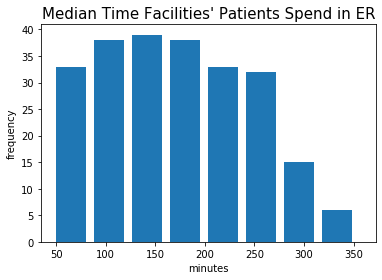

<Figure size 576x432 with 0 Axes>

In [590]:
hist_OP_18b = thinkstats2.Hist(EDV_df.OP_18b)

plt.title("Median Time Facilities' Patients Spend in ER", fontsize=15)
plt.hist(x=hist_OP_18b, width=30, bins=8)
thinkplot.Show(xlabel='minutes', ylabel='frequency')

# the y axis 'frequency' is really the count of facilities whose average time was in that particular x axis bin.

In [591]:
mean_OP_18b = EDV_df.OP_18b.mean()
print('Mean is', mean_OP_18b)

mode_OP_18b = EDV_df.OP_18b.mode()
print('Mode is', mode_OP_18b)

std_OP_18b = EDV_df.OP_18b.std()
print('Standard deviation is', std_OP_18b)

print('The tail extends farther to the right than left, with a sudden drop at about the 250 minute mark.  This might reflect a practice of ERs to move patients through in under 4 hours.')

Mean is 142.97568881685575
Mode is 0    122.0
dtype: float64
Standard deviation is 41.68990338571912
The tail extends farther to the right than left, with a sudden drop at about the 250 minute mark.  This might reflect a practice of ERs to move patients through in under 4 hours.


In [592]:
print(EDV_df.groupby('EDV')['OP_18b'].mean())

EDV
high         165.813223
low          114.461432
medium       146.367876
very high    177.523810
Name: OP_18b, dtype: float64


In [ ]:
EDV_df.info()

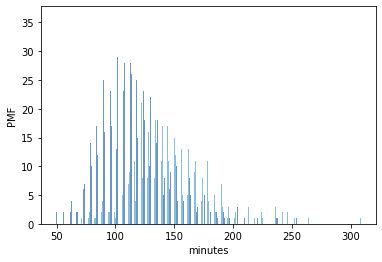

In [594]:
# not sure if it is a true PMF.  I didn't use that function!  And it only shows two volumes.

low = EDV_df[EDV_df.EDV == 'low']
medium = EDV_df[EDV_df.EDV == 'medium']
high = EDV_df[EDV_df.EDV == 'high']
very_high = EDV_df[EDV_df.EDV == "very high"]
low_hist = thinkstats2.Hist(low.OP_18b)
medium_hist = thinkstats2.Hist(medium.OP_18b)
width = 0.3
thinkplot.PrePlot(2)
thinkplot.Hist(low_hist, align='right', width=width)
thinkplot.Hist(medium_hist, align='left', width=width)
thinkplot.Config(xlabel='minutes', ylabel ='PMF')

#  Add a title and use as a PMF.
#  Try and add a legend.  I couldn't figure it out.

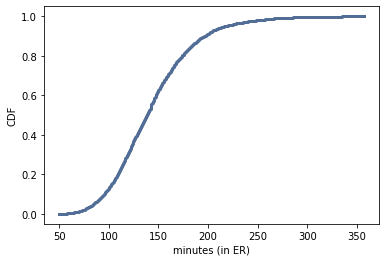

<Figure size 576x432 with 0 Axes>

In [595]:
# CDF of total minutes spent in ER

cdf_OP_18b = thinkstats2.Cdf(EDV_df.OP_18b, label = 'OP_18b')

thinkplot.Cdf(cdf_OP_18b)
thinkplot.Show(xlabel='minutes (in ER)', ylabel='CDF')

# This is GREAT!  But I still want to split it apart by ED volumes.

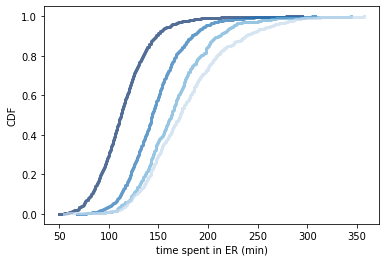

<Figure size 576x432 with 0 Axes>

In [596]:
# First I define low, medium, high, and very high - How does it know which dataframe to use??????????????
low_cdf_OP_18b = thinkstats2.Cdf(low.EDV, label='low')
medium_cdf_OP_18b = thinkstats2.Cdf(medium.EDV, label='medium')
high_cdf_OP_18b = thinkstats2.Cdf(high.EDV, label='high')
very_high_cdf_OP_18b = thinkstats2.Cdf(very_high.EDV, label='very high')

# I want to make a CDF of OP_18b that includes all four ED volumes:  (from p. 44)
low_cdf_OP_18b = thinkstats2.Cdf(low.OP_18b, label = 'low')
medium_cdf_OP_18b = thinkstats2.Cdf(medium.OP_18b, label = 'medium')
high_cdf_OP_18b = thinkstats2.Cdf(high.OP_18b, label = 'high')
very_high_cdf_OP_18b = thinkstats2.Cdf(very_high.OP_18b, label = 'very high')
thinkplot.PrePlot(4)
thinkplot.Cdfs([low_cdf_OP_18b, medium_cdf_OP_18b, high_cdf_OP_18b, very_high_cdf_OP_18b])
thinkplot.Show(xlabel='time spent in ER (min)', ylabel='CDF')

The CDF of time spent in the ER shows that people spend less time in a low volume ER.  Is this due to low volume ERs' efficiency or their tendency to have to transfer more people out of the facility due to lack of specialty care associated with smaller facilities.  BUT, then look at the CDFs for OP_3.  If you don't get transferred out of the low volume ER within the first 60 minutes, you are going to be sitting there longer.  (Interview of experienced ER RN Andrea Ducklow on 2/21/2020 revealed that low volume ERs are more likely to be connected to smaller hospitals (without all the treatment modalities available at larger hospitals), and are therefore more likely to require transfer out.  Low volume ERs are also more likely to be located in rural areas, so inability to safely provide emergency transport in a timely manner is more likely to occur (due to weather conditions and reliance on emergency transport of the receiving facility at times).

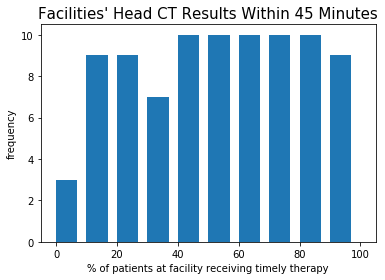

<Figure size 576x432 with 0 Axes>

In [628]:
hist_OP_23 = thinkstats2.Hist(EDV_df.OP_23)             
plt.title("Facilities' Head CT Results Within 45 Minutes", fontsize=15)
plt.hist(x=hist_OP_23, width=7, bins=10)       # used instead of thinkplot.Hist(...) so I could adjust the bin size
thinkplot.Show(xlabel='% of patients at facility receiving timely therapy', ylabel='frequency')
# Seems strange how evenly distributed these results are.

In [629]:
mean_OP_23 = EDV_df.OP_23.mean()
print('Mean is', mean_OP_23)

mode_OP_23 = EDV_df.OP_23.mode()
print('Mode is', mode_OP_23)

std_OP_23 = EDV_df.OP_23.std()
print('Standard deviation is', std_OP_23)

print('The tail extends farther to the left than right.  There is a concentration to the left of the mean.  It appears that the processes of many facilities are designed to get this task accomplished on time between 65 and 90% of the time.')


Mean is 73.75095541401274
Mode is 0    100.0
dtype: float64
Standard deviation is 18.57168125209887
The tail extends farther to the left than right.  There is a concentration to the left of the mean.  It appears that the processes of many facilities are designed to get this task accomplished on time between 65 and 90% of the time.


One thing to note about this EBP measure; The scores are not prorated. If your CT was done 46 minutes after presentation, your instance counts as a zero. It is all or nothing. Perhaps the facilities that are unable to perform a CT scan on patients who present with stroke-like symptoms should not even be attempting to do so. If their track record is that poor, they should immediately send the patient to a higher level acuity facility (as long as that facility does better at this measure).

Text(0.5, 1.0, "Facilities' Head CT Results Within 45 Minutes")

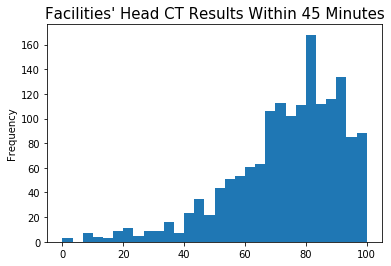

In [630]:
EDV_df['OP_23'].plot.hist(bins=30)
plt.title("Facilities' Head CT Results Within 45 Minutes", fontsize=15)
# % of patients who came to the ED with stroke symptoms who received brain scan results within 45 minutes of arrival 
# 81 facilities got this right 100% of the time (for 1354 patients)!  One or two facilities got this right 0% of the time (for 88 patients).
# What I want the x-axis to say is "% of patients at facility receiving timely results"
# I think it takes how much (%) of the time, on average, that each facility gets the CT results within 45 minutes, then
# Puts the count of facilities as the frequency on the y axis, based on how many are in each 'bin' on the x axis.
# Why does this chart look SO different than the one above it (using the book's way of doing histograms?)

In [603]:
print(EDV_df.groupby('EDV')['OP_23'].mean())

EDV
high         76.190736
low          69.321285
medium       75.925725
very high    71.281095
Name: OP_23, dtype: float64


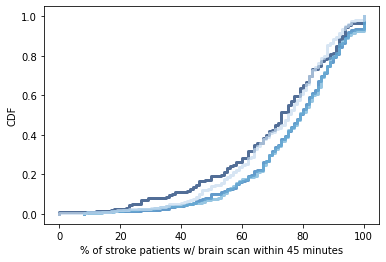

<Figure size 576x432 with 0 Axes>

In [631]:
low_cdf_OP23 = thinkstats2.Cdf(low.EDV, label='low')
medium_cdf_OP23 = thinkstats2.Cdf(medium.EDV, label='medium')
high_cdf_OP23 = thinkstats2.Cdf(high.EDV, label='high')
very_high_cdf_OP23 = thinkstats2.Cdf(very_high.EDV, label='very high')

# I want to make a CDF of OP_18b that includes all four ED volumes:  (from p. 44)
low_cdf_OP23 = thinkstats2.Cdf(low.OP_23, label = 'low')
medium_cdf_OP23 = thinkstats2.Cdf(medium.OP_23, label = 'medium')
high_cdf_OP23 = thinkstats2.Cdf(high.OP_23, label = 'high')
very_high_cdf_OP23 = thinkstats2.Cdf(very_high.OP_23, label = 'very high')
thinkplot.PrePlot(4)
thinkplot.Cdfs([low_cdf_OP23, medium_cdf_OP23, high_cdf_OP23, very_high_cdf_OP23])
thinkplot.Show(xlabel='% of stroke patients w/ brain scan within 45 minutes', ylabel='CDF')

# I don't think this chart works for this metric.

Text(0.5, 1.0, 'Average (Median) Time to Transfer Chest Pain & Heart Attack Patients')

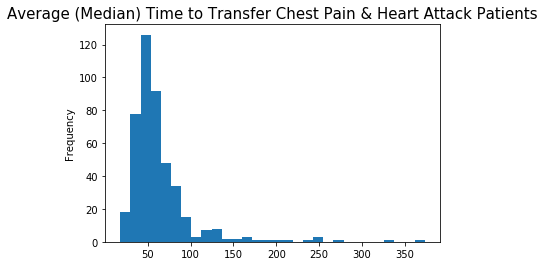

In [632]:
# seeing if I can get a true frequency histogram like OP_23 has:
OP_3b_newhist = EDV_df['OP_3b'].plot.hist(bins=30)
plt.title("Average (Median) Time to Transfer Chest Pain & Heart Attack Patients", fontsize=15)
# the y axis 'frequency' is really the count of facilities whose average time was in that particular x axis bin.

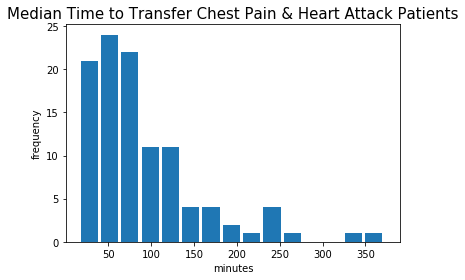

<Figure size 576x432 with 0 Axes>

In [633]:
hist_OP_3b = thinkstats2.Hist(EDV_df.OP_3b)
plt.title('Median Time to Transfer Chest Pain & Heart Attack Patients', fontsize=15)

plt.hist(x=hist_OP_3b, width=20, bins=15)
thinkplot.Show(xlabel='minutes', ylabel='frequency')

In [607]:
mean_OP_3b = EDV_df.OP_3b.mean()
print('Mean is', mean_OP_3b)

mode_OP_3b = EDV_df.OP_3b.mode()
print('Mode is', mode_OP_3b)

std_OP_3b = EDV_df.OP_3b.std()
print('Standard deviation is', std_OP_3b)
      
print('The tail extends farther to the right than left, with a sudden drop at about the 85-90 minute mark.  This suggests a practice or goal of getting patients out in under 90 minutes.')

Mean is 63.19686800894855
Mode is 0    52.0
dtype: float64
Standard deviation is 39.28887711055245
The tail extends farther to the right than left, with a sudden drop at about the 85-90 minute mark.  This suggests a practice or goal of getting patients out in under 90 minutes.


In [608]:
print(EDV_df.groupby('EDV')['OP_3b'].mean())

EDV
high         59.976471
low          73.634409
medium       60.930876
very high    59.250000
Name: OP_3b, dtype: float64


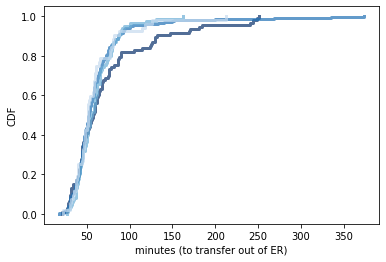

<Figure size 576x432 with 0 Axes>

In [634]:
low_cdf_OP_3b = thinkstats2.Cdf(low.EDV, label='low')
medium_cdf_OP_3b = thinkstats2.Cdf(medium.EDV, label='medium')
high_cdf_OP_3b = thinkstats2.Cdf(high.EDV, label='high')
very_high_cdf_OP_3b = thinkstats2.Cdf(very_high.EDV, label='very high')

# I want to make a CDF of OP_18b that includes all four ED volumes:  (from p. 44)
low_cdf_OP_3b = thinkstats2.Cdf(low.OP_3b, label = 'low')
medium_cdf_OP_3b = thinkstats2.Cdf(medium.OP_3b, label = 'medium')
high_cdf_OP_3b = thinkstats2.Cdf(high.OP_3b, label = 'high')
very_high_cdf_OP_3b = thinkstats2.Cdf(very_high.OP_3b, label = 'very high')
thinkplot.PrePlot(4)
thinkplot.Cdfs([low_cdf_OP_3b, medium_cdf_OP_3b, high_cdf_OP_3b, very_high_cdf_OP_3b])
thinkplot.Show(xlabel='minutes (to transfer out of ER)', ylabel='CDF')

# It looks like if you don't get transferred out of an ER within the first 60 minutes, your transfer is going to be even
# more delayed if you are at a low volume ER.

Text(0.5, 1.0, 'Median Time to ECG in Minutes')

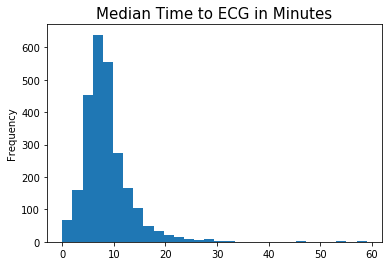

In [635]:
# seeing if I can get a true frequency histogram like OP_23 has:
EDV_df['OP_5'].plot.hist(bins=30)
plt.title("Median Time to ECG in Minutes", fontsize=15)

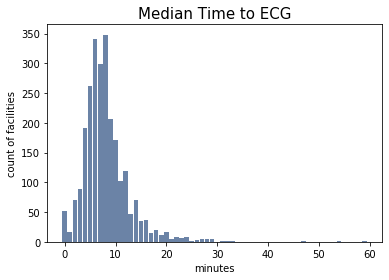

<Figure size 576x432 with 0 Axes>

In [636]:
hist_OP_5 = thinkstats2.Hist(EDV_df.OP_5)
thinkplot.Hist(hist_OP_5)
plt.title('Median Time to ECG', fontsize=15)
thinkplot.Show(xlabel='minutes', ylabel='count of facilities')

In [612]:
mean_OP_5 = EDV_df.OP_5.mean()
print('Mean is', mean_OP_5)

mode_OP_5 = EDV_df.OP_5.mode()
print('Mode is', mode_OP_5)

std_OP_5 = EDV_df.OP_5.std()
print('Standard deviation is', std_OP_5)
      
print('The mean and the mode are almost the same.  The data is approximately normally distributed.  The tail does extend farther to the right, with three (way) outliers, which would benefit from facility-level drill down or root cause analysis.  Remember that the data for each facility is the median number of minutes for that facility.  I need to remove the three outlier facilities and replot the data.')

Mean is 8.083722741433021
Mode is 0    8.0
dtype: float64
Standard deviation is 4.636578185409626
The mean and the mode are almost the same.  The data is approximately normally distributed.  The tail does extend farther to the right, with three (way) outliers, which would benefit from facility-level drill down or root cause analysis.  Remember that the data for each facility is the median number of minutes for that facility.  I need to remove the three outlier facilities and replot the data.


In [ ]:
print(EDV_df.groupby('EDV')['OP_5'].mean())
# The facilities, when subsetted by ED volume, have nearly identical mean time to ECG (in minutes).

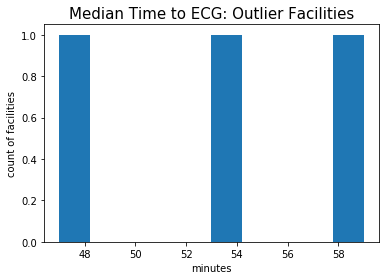

<Figure size 576x432 with 0 Axes>

In [614]:
# Try and remove the outliers > 40 minutes.  Looks like there are three of them.  Use p. 20 in text to start, maybe.
OP_5_trimmed = EDV_df[EDV_df.OP_5 > 40]
OP_5_trimmed_hist = thinkstats2.Hist(OP_5_trimmed.OP_5)
plt.hist(x=OP_5_trimmed_hist)
plt.title('Median Time to ECG: Outlier Facilities', fontsize=15)
thinkplot.Show(xlabel='minutes', ylabel='count of facilities')
# Aha!  So there was one facility with median time of 47 minutes, one at 53 minutes, and one at 58 minutes.  I wonder if their n was 1?
# That all three outlier facilities had medians just under one hour makes me wonder if one hour is some sort of 'trigger' metric - meaning that if your median time is one hour or more, your facility is no longer approved to accept Medicare (and basically has to close its doors)?

In [ ]:
# What if I tried to remove all rows with at least one outlier (using standard deviation of 3) from OP_5 in the dataframe?
# Idea is from https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
# Except it took some results that I would not consider outliers. I had to up it to standard deviation of 6 to only get rid of the 3 outliers above 40 minutes.  Ugly!
df_nooutliers = EDV_df[((EDV_df.OP_5 - EDV_df.OP_5.mean()) / EDV_df.OP_5.std()).abs() <6]
df_nooutliers.head()
# Should rerun all previous histograms using df_new as the dataframe?  Otherwise will the correlations be messed up?
# I don't think we've covered six sigma yet in this program!

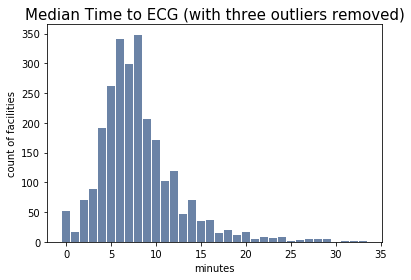

<Figure size 576x432 with 0 Axes>

In [616]:
# Run the OP_5 histogram again (without the outliers), using df_nooutliers as the dataframe - so I can get the mean and mode.  I couldn't get them when I removed the three values from the histogram.
# Remove the outliers > 40 minutes.  Looks like there are three of them.  Use p. 20 in text to start, maybe.

df_nooutliers_OP_5 = df_nooutliers[df_nooutliers.OP_5 <= 40]
df_nooutliers_OP_5_hist = thinkstats2.Hist(df_nooutliers_OP_5.OP_5)
plt.title('Median Time to ECG (with three outliers removed)', fontsize=15)
thinkplot.Hist(df_nooutliers_OP_5_hist)
thinkplot.Show(xlabel='minutes', ylabel='count of facilities')

In [617]:
mean_OP_5_nooutliers = df_nooutliers_OP_5.OP_5.mean()
print('Mean is', mean_OP_5_nooutliers)

mode_OP_5_nooutliers = df_nooutliers_OP_5.OP_5.mode()
print('Mode is', mode_OP_5_nooutliers)

std_OP_5_nooutliers = df_nooutliers_OP_5.OP_5.std()
print('Standard deviation is', std_OP_5_nooutliers)

print('The tail extends farther to the right than left, which is an expected result in this measure in which time')

Mean is 8.030799220272904
Mode is 0    8.0
dtype: float64
Standard deviation is 4.3699158942273195
The tail extends farther to the right than left, which is an expected result in this measure in which time


Maybe use this chart (with three outliers removed) to show the data, and explain that three outliers have been removed, but use the dataframe with the outliers in it for all calculations, because I can't validate that it only removed the three outliers in question.  Other rows seem to have disappeared too!

In [ ]:
# Checking to see if the means for any of the ED volume subsets change much when the three outliers are removed.  Nope!
print(df_nooutliers.groupby('EDV')['OP_5'].mean())

In [ ]:
df_nooutliers.info()

Nope!  This removed a couple thousand rows that I wasn't expecting it to.  AND the mean, median, and standard deviation of the OP_5 series remain nearly identical before and after trying to remove the outliers. 
So I'm going to use the OP_5 series including the three outliers.

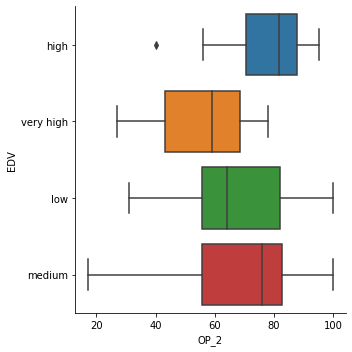

In [620]:
import seaborn as sns        
sns.catplot(x='OP_2', y='EDV', kind='box', data=EDV_df)

# C:\Users\Branch\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been 
# renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default 
# `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`. warnings.warn(msg)'''

# That is interesting.  When I change 'kind' to 'strip' in my code, it errors out.
# Why would 'very high' volumne ERs do so much better than 'high' volume ERs?  And low and medium in between the two?!
# This suggests that I am not going to have a straight-forward "yes/no" answer to my hypothesis.  I need to look at the other variables.

I think this boxplot is showing me that I have one outlier in my OP_2 values, and it is in an ED with high volume.  I should take a look.  Interestingly, the single outlier is not evident at all on the OP_2 histogram (when the values are not subsetted by ED volume).  That is because that single value would not be an outlier if it were in any of the other EDs by volume. Since I do not know why the high volume EDs and very high volume EDs are the high and the low performers (with low and medium volume EDs falling in between them), I am going to keep the single outlier in the dataset.
I'd like to reorder the variables on the y-axis in the boxplot above, in order of volume; 'very high,' 'high,' 'medium,' 'low,' and 'not available.'
Need to add X axis (and maybe other) labels to the histograms above. Consider side-by-side histograms? https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0 Then work on effect size, PMFs, CDFs, ...

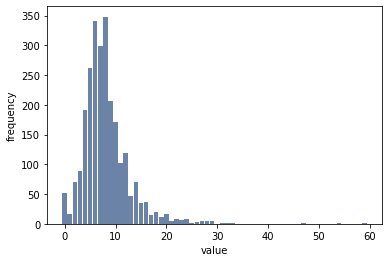

<Figure size 576x432 with 0 Axes>

In [621]:
hist_OP_5
# p. 16 how to make a histogram:
import thinkplot
thinkplot.Hist(hist_OP_5)
thinkplot.Show(xlabel ='value', ylabel='frequency')

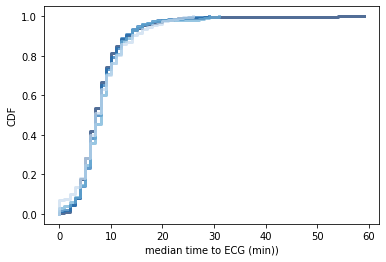

<Figure size 576x432 with 0 Axes>

In [622]:
low_cdf_OP_5 = thinkstats2.Cdf(low.EDV, label='low')
medium_cdf_OP_5 = thinkstats2.Cdf(medium.EDV, label='medium')
high_cdf_OP_5 = thinkstats2.Cdf(high.EDV, label='high')
very_high_cdf_OP_5 = thinkstats2.Cdf(very_high.EDV, label='very high')

# I want to make a CDF of OP_5 that includes all four ED volumes:  (from p. 44)
low_cdf_OP_5 = thinkstats2.Cdf(low.OP_5, label = 'low')
medium_cdf_OP_5 = thinkstats2.Cdf(medium.OP_5, label = 'medium')
high_cdf_OP_5 = thinkstats2.Cdf(high.OP_5, label = 'high')
very_high_cdf_OP_5 = thinkstats2.Cdf(very_high.OP_5, label = 'very high')
thinkplot.PrePlot(4)
thinkplot.Cdfs([low_cdf_OP_5, medium_cdf_OP_5, high_cdf_OP_5, very_high_cdf_OP_5])
thinkplot.Show(xlabel='median time to ECG (min))', ylabel='CDF')

# So it looks like EVERYONE gets that ECG done timely!  I think the expectation is 10 minutes.  (source)
# That makes sense - no specialized equipment required and any ER RN can run one.

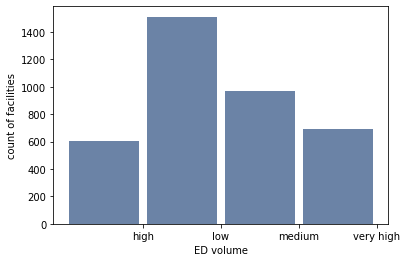

<Figure size 576x432 with 0 Axes>

In [623]:
# This is the count of ED's by volume.  It shows sample size.
# I think I've created a new dataframe, ED_vol. (see p. 16-17)
# First I need to figure out how to get a series of only the OP_5 results from low volume EDs.  (this is not it yet!)

ED_vol = EDV_df[EDV_df.EDV != 'stupid way to not exclude any']
ED_vol_hist = thinkstats2.Hist(ED_vol.EDV, label='EDV')
thinkplot.Hist(ED_vol_hist)
thinkplot.Show(xlabel='ED volume', ylabel='count of facilities')

In [ ]:
ED_vol.head()

In [625]:
# For each ED volume category in the data, what was the OP_5?  (p. 19 in Pandas book)
grouped_vol_df = ED_vol.groupby('EDV')
grouped_vol_df_OP_5 = grouped_vol_df['OP_5']
print(grouped_vol_df_OP_5)
#This gives me a series (because I only asked for 1 column) in which the contents of the series are grouped (by ED volume)
# to get the mean OP_5 by ED volume:
mean_OP_5_by_vol = grouped_vol_df_OP_5.mean()
print(mean_OP_5_by_vol)

EDV
high         8.336336
low          8.029686
medium       8.060993
very high    8.071225
Name: OP_5, dtype: float64


In [ ]:
grouped_vol_df_OP_5.tail()

Index(['EDV', 'ED_1b', 'ED_2b', 'OP_18b', 'OP_2', 'OP_22', 'OP_23', 'OP_3b',
       'OP_5'],
      dtype='object', name='Measure ID')


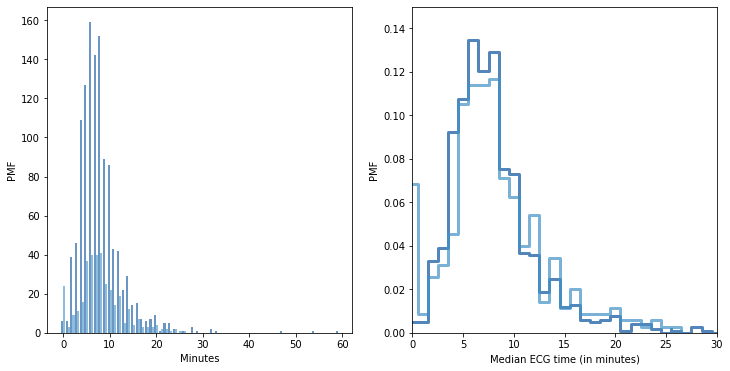

In [681]:
# take the ED_vol and create a new df with only EDV and OP_5,
print(ED_vol.columns)
OP5_only_df = ED_vol.drop(['ED_1b', 'ED_2b', 'OP_18b', 'OP_2', 'OP_22', 'OP_23', 'OP_3b'], axis = 1)

# then delete any OP_5s that are NaN, (from p.197 in golden-tailed tree shrew book)
cleaned_OP5 = OP5_only_df.dropna()

# create pmfs from that new df (from p. 20-21)
lows = cleaned_OP5[cleaned_OP5.EDV == 'low']
vhighs = cleaned_OP5[cleaned_OP5.EDV == 'very high']

lows_hist = thinkstats2.Hist(lows.OP_5)
vhighs_hist = thinkstats2.Hist(vhighs.OP_5)

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(lows_hist, align='right', width=width)
thinkplot.Hist(vhighs_hist, align='left', width=width)
thinkplot.Config(xlabel='Minutes', ylabel='PMF')

lows_pmf = thinkstats2.Pmf(lows.OP_5, label='low')
vhighs_pmf = thinkstats2.Pmf(vhighs.OP_5, label='very high')

width = 0.45
axis = [0, 30, 0, 0.15]
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([lows_pmf, vhighs_pmf])
thinkplot.Config(xlabel='Median ECG time (in minutes)', ylabel='PMF', axis=axis)

# So you can get an ECG in under a minute at a number of very high volume ERs,but after that the low volume ERs edge ahead by about a minute.
# Your probability of it taking greater than 10 minutes, which is industry standard, is worse at a very high volume ER.
# Why doesn't the legend show?!

In [ ]:
cleaned_OP5.head()

In [ ]:
cleaned_OP5.describe()

In [ ]:
cleaned_OP5.info()

# Scatter plot of OP_3b (time to transfer out chest pain and heart attack patients) and OP_5 (median time to ECG):

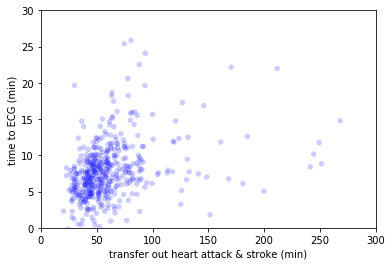

In [637]:
# from p. 79-80 in text, except I'm not choosing a random subset, I'm choosing all rows (because I can):
OP3bs, OP5s = EDV_df.OP_3b, EDV_df.OP_5              # selecting my two variables that are measured in minutes

# add jittering, using 0.5 in case they rounded the minutes?
transfers = thinkstats2.Jitter(OP3bs, 0.5)
ECGs = thinkstats2.Jitter(OP5s, 0.5)

# add alpha=0.2 for transparency, otherwise chart saturation "gives disproportionate emphasis to outliers"  (p. 81 in Downey)
thinkplot.Scatter(transfers, ECGs, alpha=0.2)
thinkplot.Config(xlabel='transfer out heart attack & stroke (min)',
                ylabel='time to ECG (min)',
                axis=[0, 300, 0, 30],
                legend=False)

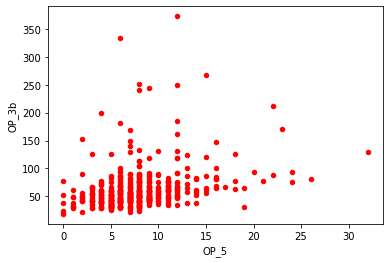

In [641]:
# same variables, different way of creating the scatter plot
# a scatter plot comparing median time to ECG to time to transfer out chest pain and heart attack patients
import pyodbc                 # Found this on Tutorial Gateway for a scatter plot
import matplotlib.pyplot as plt

EDV_df.plot(kind='scatter', x='OP_5', y='OP_3b', color='red')
plt.show()

In [642]:
# Covariance definition from p. 84 in Downey text

EDV_df_splot = EDV_df.dropna(subset=['OP_3b', 'OP_5'])
OP3bs, OP5s = EDV_df_splot.OP_3b, EDV_df_splot.OP_5 

def Cov(OP3bs, OP5s, meanx=None, meany=None):
    OP3bs = np.asarray(OP3bs)
    OP5s = np.asarray(OP5s)

    if meanx is None:
        meanx = np.mean(OP3bs)
    if meany is None:
        meany = np.mean(OP5s)

    cov = np.dot(OP3bs-meanx, OP5s-meany) / len(OP3bs)
    return cov

Cov(OP3bs, OP5s)

# returns 48.5647643499542

48.5647643499542

In [643]:
# Pearson's Correlation from p. 85 in Downey text:
def Corr(OP3bs, OP5s):
    OP3bs = np.asarray(OP3bs)
    OP5s = np.asarray(OP5s)

    meanx, varx = thinkstats2.MeanVar(OP3bs)
    meany, vary = thinkstats2.MeanVar(OP5s)

    corr = Cov(OP3bs, OP5s, meanx, meany) / np.sqrt(varx * vary)
    return corr

Corr(OP3bs, OP5s)

# returns 0.30298015703515135.  

0.30298015703515135

The correlation is positive.  When time to ECG is high, time to transfer out tends to be high.  

# Conduct a test on your hypothesis using one of the methods covered in Chapter 9. 
Permutation test
"To compute the p-value of an observed difference in means, we can assume that there is no difference between the groups and generate simulated results by shuffling the data."

In [683]:
# I never did get this to work, but I wanted to use it because it made sense.
# Testing a correlation (p. 107 in Downey text)
# looking at OP_2, comparing means of the very high and high volume ERs (because the box plot chart shows them as different)

class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        highOP2, vhighOP2 = data
        test_stat = abs(highOP2.mean() - vhighOP2.mean())
        return test_stat

    def MakeModel(self):
        highOP2, vhighOP2 = self.data
        self.n, self.m = len(highOP2), len(vhighOP2)
        self.pool = np.hstack((highOP2, vhighOP2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
        
def main():
    
    # volumes, highOP2, vhighOP2 = MakeFrames()
    volumes = EDV_df.dropna(subset=['EDV', 'OP_2'])
    data = highOP2.EDV.values, vhighOP2.EDV.values
    ht = CorrelationPermute(data)
    pvalue = ht.PValue()
    
if __name__ == "__main__":
    main()

# This didn't run for me.

NameError: name 'highOP2' is not defined

## Testing a Correlation

In [671]:
# from p. 107 in Downey text:

class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [672]:
cleaned = EDV_df.dropna(subset=['OP_5', 'OP_3b'])
data = cleaned.OP_5.values, cleaned.OP_3b.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

# This produces a p value of 0.0, which is statistically significant and unlikely to occur by chance.

0.0

In [674]:
# Linear Least Squares (p. 118 in Downey text):

import first
cleaned_LLS = EDV_df.dropna(subset=['OP_5', 'OP_3b'])
ECGs = cleaned_LLS.OP_5
transfers = cleaned_LLS.OP_3b

from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(ECGs, transfers):
    meanx, varx = MeanVar(ECGs)
    meany = Mean(transfers)

    slope = Cov(ECGs, transfers, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [675]:
inter, slope = LeastSquares(ECGs, transfers)
inter, slope

(40.219794732405106, 2.9112108148001474)

In [676]:
inter + slope * 25

113.0000651024088

In [678]:
def FitLine(ECGs, inter, slope):
    fit_xs = np.sort(ECGs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

fit_xs, fit_ys = FitLine(ECGs, inter, slope)

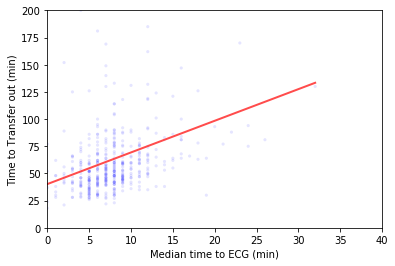

In [682]:
thinkplot.Scatter(ECGs, transfers, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Median time to ECG (min)",
                 ylabel="Time to Transfer out (min)",
                 axis=[0, 40, 0, 200],
                 legend=False)

# This shows a scatter plot of time to ECG and time to transfer out, along with a fitted line.  
# This relationship appears to be linear and seems like a good model for the relationship.